## Analisis Data COVID19 di Dunia & ASEAN

Project mandiri, dengan materi yang diperoleh dari kursus online di DQLab Academy

In [1]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

#### Membuat Fungsi get API

In [2]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

#### Memanggil API Covid19
URL yang digunakan adalah `https://covid19-api.org/api/status?date=2020-11-10`

In [3]:
record_date = '2020-11-10'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update     cases  deaths  recovered
0      US  2020-11-09T23:25:07  10029556  238024    3881558
1      IN  2020-11-09T23:25:07   8553657  126611    7917373
2      BR  2020-11-09T23:25:07   5664115  162397    5147172
3      FR  2020-11-09T23:25:07   1856292   41049     135216
4      RU  2020-11-09T23:25:07   1781997   30546    1326568


#### Merubah Format date

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [5]:
df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2020-11-09,10029556,238024,3881558
1,IN,2020-11-09,8553657,126611,7917373
2,BR,2020-11-09,5664115,162397,5147172
3,FR,2020-11-09,1856292,41049,135216
4,RU,2020-11-09,1781997,30546,1326568


In [6]:
df_covid_worldwide.shape

(208, 5)

#### Mengambil Data Countries

In [7]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries.head()

<ipython-input-7-a4224762822b>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


,name,alpha2,alpha3,numeric,latitude,longitude
0,Afghanistan,AF,AFG,004,33.0,65.0
1,Albania,AL,ALB,008,41.0,20.0
2,Algeria,DZ,DZA,012,28.0,3.0
3,Andorra,AD,AND,020,42.5,1.5
4,Angola,AO,AGO,024,-12.5,18.5


In [8]:
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


#### Merge Covid19 Data dan Countries

In [9]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,US,2020-11-09,10029556,238024,3881558,United States of America
1,IN,2020-11-09,8553657,126611,7917373,India
2,BR,2020-11-09,5664115,162397,5147172,Brazil
3,FR,2020-11-09,1856292,41049,135216,France
4,RU,2020-11-09,1781997,30546,1326568,Russian Federation


#### Menghitung Fatality Ratio

In [10]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths'] / df_covid_denormalized['cases'] 

In [11]:
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2020-11-09,10029556,238024,3881558,United States of America,0.023732
1,IN,2020-11-09,8553657,126611,7917373,India,0.014802
2,BR,2020-11-09,5664115,162397,5147172,Brazil,0.028671
3,FR,2020-11-09,1856292,41049,135216,France,0.022113
4,RU,2020-11-09,1781997,30546,1326568,Russian Federation,0.017141


#### Negara-negara dengan Fatality Ratio Tertinggi

In [12]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

In [13]:
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
152,YE,2020-11-09,2071,605,1394,Yemen,0.292129
192,EH,2020-11-09,10,1,8,Western Sahara,0.100000
9,MX,2020-11-09,967825,95027,824355,Mexico,0.098186
104,SD,2020-11-09,14155,1116,9492,Sudan,0.078841
35,EC,2020-11-09,175269,12839,154956,Ecuador,0.073253
155,TD,2020-11-09,1551,99,1394,Chad,0.063830
39,BO,2020-11-09,142475,8795,114466,Plurinational State of Bolivia,0.061730
183,FJ,2020-11-09,34,2,31,Fiji,0.058824
50,EG,2020-11-09,109422,6380,100439,Egypt,0.058306
156,LR,2020-11-09,1452,82,1310,Liberia,0.056474


## Melakukan Visualisasi

#### Visualisasi Negara dengan Fatality Ratio Tertinggi

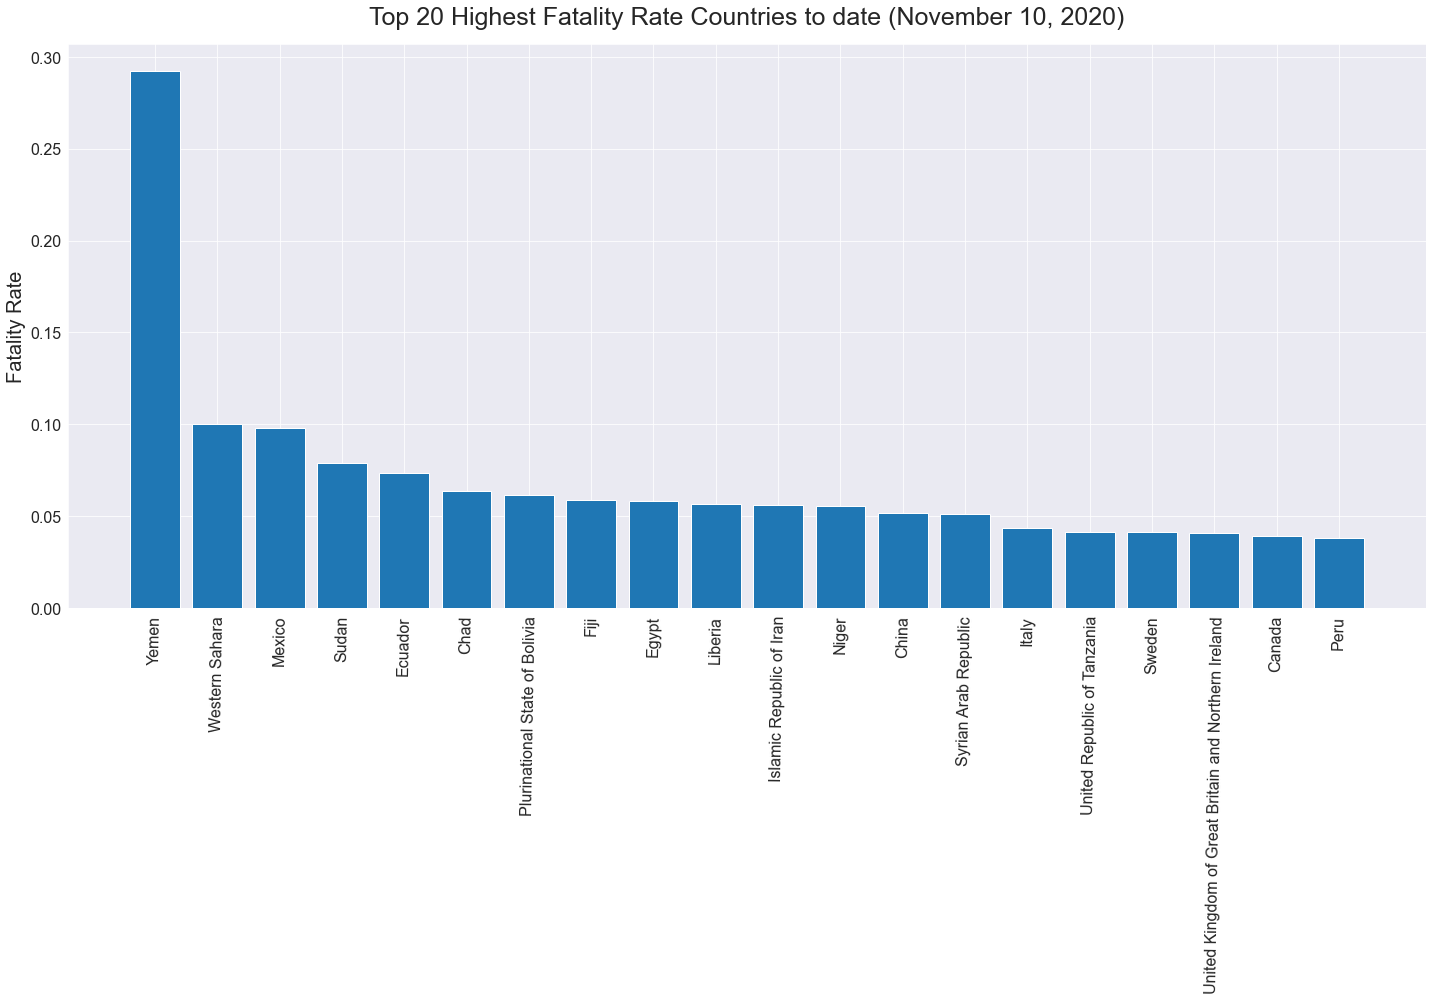

In [14]:
plt.figure(figsize=(20, 14))
plt.bar(x = df_top_20_fatality_rate['name'], height = df_top_20_fatality_rate['fatality_ratio'])
plt.ylabel('Fatality Rate', fontsize=20)
plt.title('Top 20 Highest Fatality Rate Countries to date (November 10, 2020)', pad=20, fontsize=25)
plt.xticks(rotation=89, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

## Covid19 di ASEAN
Membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:- 
- MY -> Malaysia,
- SG -> Singapure,
- TH -> Thailand,
- VN -> Vietnam.

In [15]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1

print(df_covid_timeline_merged.head())

<ipython-input-15-5d49c6fa2431>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


  country last_update  cases  deaths  recovered
0      VN  2020-11-13   1253      35       1093
1      VN  2020-11-12   1253      35       1093
2      VN  2020-11-11   1252      35       1087
3      VN  2020-11-10   1226      35       1087
4      VN  2020-11-09   1215      35       1087


#### Merge Data Covid19 Dengan Data Country

In [16]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [17]:
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-13,1253,35,1093,Viet Nam
1,VN,2020-11-12,1253,35,1093,Viet Nam
2,VN,2020-11-11,1252,35,1087,Viet Nam
3,VN,2020-11-10,1226,35,1087,Viet Nam
4,VN,2020-11-09,1215,35,1087,Viet Nam
...,...,...,...,...,...,...
1358,ID,2020-03-10,27,0,2,Indonesia
1359,ID,2020-03-09,19,0,0,Indonesia
1360,ID,2020-03-08,6,0,0,Indonesia
1361,ID,2020-03-06,4,0,0,Indonesia


#### Kasus Covid-19 di ASEAN sampai saat ini

In [18]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

In [19]:
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-13,1253,35,1093,Viet Nam
1,VN,2020-11-12,1253,35,1093,Viet Nam
2,VN,2020-11-11,1252,35,1087,Viet Nam
3,VN,2020-11-10,1226,35,1087,Viet Nam
4,VN,2020-11-09,1215,35,1087,Viet Nam
...,...,...,...,...,...,...
1358,ID,2020-03-10,27,0,2,Indonesia
1359,ID,2020-03-09,19,0,0,Indonesia
1360,ID,2020-03-08,6,0,0,Indonesia
1361,ID,2020-03-06,4,0,0,Indonesia


#### Visualisasi Kasus Covid-19 di ASEAN

<Figure size 432x288 with 0 Axes>

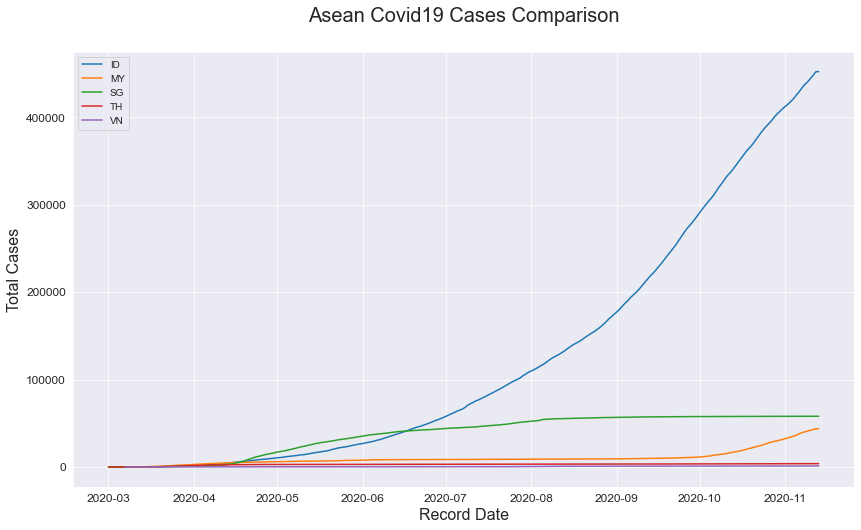

In [20]:
plt.clf()
plt.figure(figsize=(14, 8))
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Asean Covid19 Cases Comparison', pad=30, fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()